In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
# matplotlib의 rc를 import하면서 폰트 한글 설정 가능
from matplotlib import rc
rc('font', family='Malgun Gothic')
%matplotlib inline
from scipy import stats as ss
import seaborn as sns
from statsmodels import api as sma
from statsmodels.formula import api as smfa
from statsmodels import regression as smr
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
import random

In [2]:
death = np.array([2, 1, 2, 4, 2, 5, 3, 3, 5, 6, 3, 8, 3,
                  3, 6, 3, 6, 5, 3, 5, 2, 6, 2, 3, 4, 3,
                  2, 9, 2, 2, 3, 2, 7, 3, 2, 10, 6, 2, 3,
                  1, 2, 3, 3, 4, 3, 2, 6, 2, 2, 3, 2, 3,
                  4, 3, 2, 3, 5, 2, 5, 5, 3, 4, 3, 6, 2,
                  1, 2, 3, 2, 6, 3, 3, 6, 3, 2, 3, 6, 4,
                  6, 5, 3, 5, 6, 2, 6, 3, 2, 3, 2, 6, 2,
                  6, 3, 3, 2, 6, 9, 6, 3, 6, 6, 2, 3, 2,
                  3, 5, 3, 5, 2, 3, 2, 3, 3, 1, 3, 3, 2,
                  3, 3, 4, 3, 6, 6, 3, 3, 3, 2, 3, 3, 6])
# 혹은 Series 생성 이후 value_counts() 메서드 활용
(pd.Series(death)
.value_counts(sort=False)
.rename(dict(enumerate(["감염","각종암","순환기","호흡기","소화기",
               "사고사","비뇨기","정신병","노환","신경계"], 1)))\
)
# pd.crosstab() 함수를 통해 도수분포로 배치
# 그냥 death를 집어넣는게 아니라 pd.Series(death)를 집어넣어야 axis가 안꼬임
table = pd.crosstab(index=pd.Series(death), colnames=['질병'], columns='도수')
table.index = ["감염","각종암","순환기","호흡기","소화기",
               "사고사","비뇨기","정신병","노환","신경계"]
table

질병,도수
감염,4
각종암,33
순환기,48
호흡기,7
소화기,11
사고사,22
비뇨기,1
정신병,1
노환,2
신경계,1


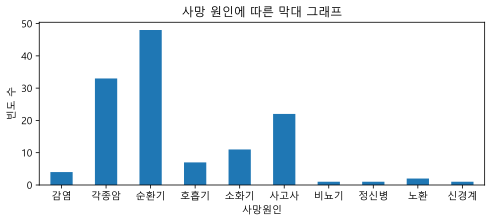

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
# legend=False 인자 전달하여 범례 제거 가능
# color 파라미터는 리스트로도 전달 가능
table.plot.bar(rot=0, legend=False, ax=ax)
ax.set_xlabel('사망원인')
ax.set_ylabel('빈도 수')
ax.set_title('사망 원인에 따른 막대 그래프')
# plt.rc() 함수 사용하여 글씨 크기들 조절 가능
plt.rc('font', size=8)

Text(0.5, 1.0, '사망 원인에 따른 막대 그래프')

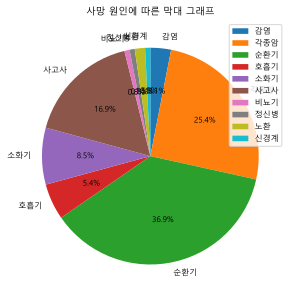

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# squeeze()를 통해 Series로 바꿔주거나, 혹은 subplots=True 인자 전달
table.plot.pie(subplots=True, startangle=90, counterclock=False, autopct='%.1f%%', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('사망 원인에 따른 막대 그래프')

In [5]:
table2 = pd.DataFrame(death, columns=['질병코드'])
table2 = table2.replace(dict(enumerate(["감염", "각종암", "순환기", "호흡기", "소화기", "사고사", "비뇨기", "정신병", "노환", "신경계"], 1)))
table_index2 = table2.value_counts(normalize=True).index[:3]
# 왜 MultiIndex로 나오지..?
# 다른 방식으로 시도 → reset_index() 활용
(table2
.value_counts()
.reset_index(name='빈도')
.loc[:3, '질병코드']
.tolist()
)

['순환기', '각종암', '사고사', '소화기']

<AxesSubplot:>

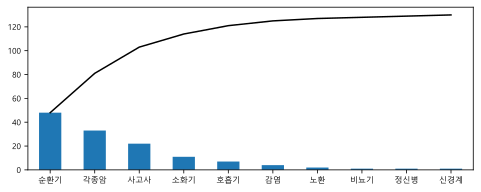

In [6]:
# pandas 및 matplotlib만 활용하여 파레토차트 그리기 -> 같은 ax에 바 그래프와 선 그래프 삽입
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
(table
.sort_values('도수', ascending=False)
.assign(누적도수=lambda df: df['도수'].cumsum())
['도수']
.plot.bar(ax=ax, rot=0)
)
(table
.sort_values('도수', ascending=False)
.assign(누적도수=lambda df: df['도수'].cumsum())
['누적도수']
.plot(ax=ax, color='black', rot=0)
)

<AxesSubplot:ylabel='Frequency'>

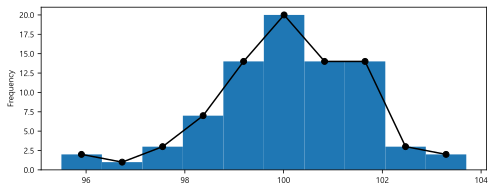

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
drink = np.array([101.8, 101.5, 101.8, 102.6, 101, 96.8, 102.4, 100, 98.8, 98.1,
                  98.8, 98, 99.4,95.5, 100.1, 100.5, 97.4, 100.2, 101.4, 98.7,
                  101.4, 99.4, 101.7, 99, 99.7, 98.9, 99.5, 100, 99.7, 100.9,
                  99.7, 99, 98.8, 99.7, 100.9, 99.9, 97.5, 101.5, 98.2, 99.2,
                  98.6, 101.4, 102.1, 102.9, 100.8, 99.4, 103.7, 100.3, 100.2, 101.1,
                  101.8, 100, 101.2, 100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1,
                  100.1, 101.6, 99.3, 96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9,
                  101.3, 99.9, 99.1, 100.7, 100.8, 100.8, 101.4, 100.3, 98.4, 97.2])
# pandas Series() 함수 이용하여 바로 히스토그램 생성 가능
pd.Series(drink).plot.hist(bins=10, ax=ax)
# pandas cut() 함수 이용하여 구간 설정 가능
drink_cut = (pd.DataFrame(drink, columns=['용량'])
.assign(구간=lambda df: pd.cut(df['용량'], bins=10))
['구간']
.value_counts(sort=False)
)
# cut() 함수를 value_counts() 메서드에 연결했을 때 인덱스는 pandas Interval 객체 -> mid 속성 이용하여 중앙값 반환 가능
drink_cut.index = [drink_cut.index[i].mid for i in range(len(drink_cut.index))]
drink_cut.plot(color='black', marker='o', ax=ax)

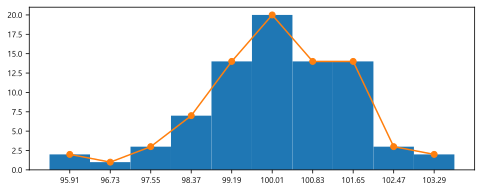

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
# pyplot의 hist() 함수로 출력했을 때 iterable 객체 생성 -> 언패킹 가능
# 도수, 각 구간값, 히스토그램의 튜플로 결과 출력
n, bins, patches = plt.hist(drink)
x = [(bins[i] + bins[i-1]) / 2 for i in range(1, 11)]
plt.plot(x, n, marker='o')
ax.set_xticks(x)

In [9]:
# 평균과 중앙값, 백분위수(np.percentile())은 numpy 이용, 최빈값은 scipy.stats 이용
# cf) from scipy import stats == import scipy.stats, 단 라이브러리 함수를 출력할 때 차이(stats / scipy.stats)
np.mean(drink), np.median(drink), ss.mode(drink), np.percentile(drink, 50), np.average(drink)

(100.04125,
 100.05,
 ModeResult(mode=array([99.7]), count=array([6])),
 100.05,
 100.04125)

In [10]:
# 표본의 분산과 표준편차를 구하는 경우 ddof 파라미터를 활용하여 1를 차감한 자유도 활용
np.var(drink, ddof=1), np.std(drink, ddof=1)

(2.316125000000001, 1.521882058505192)

In [11]:
height = np.array([181,161,170,160,158,168,162,179,183,178,171,177,163,158,160,160,158,
                   173,160,163,167,165,163,173,178,170,167,177,175,169,152,158,160,160,
                   159,180,169,162,178,173,173,171,171,170,160,167,168,166,164,173,180])
weight = np.array([78,49,52,53,50,57,53,54,71,73,55,73,51,53,65,48,59,
                   64,48,53,78,45,56,70,68,59,55,64,59,55,38,45,50,46,
                   50,63,71,52,74,52,61,65,68,57,47,48,58,59,55,74,74])
# numpy의 corrcoef() 함수 활용하여 상관계수 출력 -> numpy 2 * 2 array로 출력
np.corrcoef(height, weight)

array([[1.        , 0.73627651],
       [0.73627651, 1.        ]])

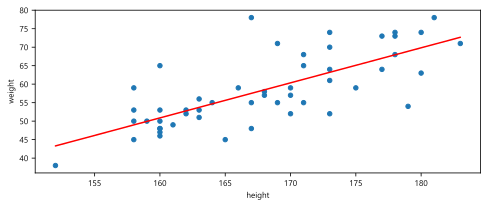

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
# numpy array를 그냥 더하면 벡터화 계산 수행 -> 리스트를 두 번 묶은 다음 array로 다시 합쳐줘야 또는 np.hstack()..?
# pandas DataFrame의 T 속성 이용하여 변경 가능
df_height_weight = (pd.DataFrame(np.array([height] + [weight])).T
.rename(dict(enumerate(['height', 'weight'])), axis=1)
)
(df_height_weight
.plot.scatter(x='height', y='weight', ax=ax)
)
# numpy의 polyfit(x, y, 다항식) 함수를 통해 회귀직선의 기울기 및 절편 확인 가능
b1, b0 = np.polyfit(height, weight, 1)
ax.plot(height, b0 + b1*height, color='red')

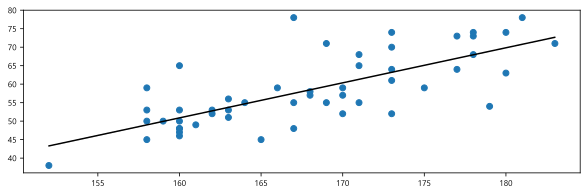

In [40]:
formula = 'weight ~ height'
model = smfa.ols(formula, data=df_height_weight).fit()
model.predict(df_height_weight['height'])
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.scatter(x=df_height_weight['height'], y=df_height_weight['weight'])
ax.plot(df_height_weight['height'], model.predict(df_height_weight['height']), color='black')

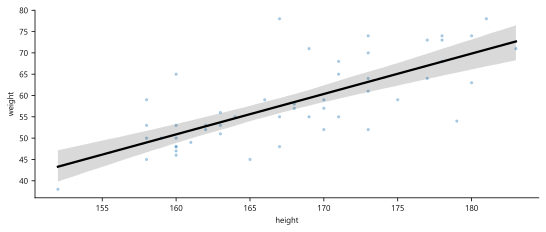

In [13]:
# seaborn의 lmplot() 함수 사용하여 회귀직선까지 표현 가능
grid = sns.lmplot(data=df_height_weight, x='height', y='weight', scatter_kws={'s':5, 'alpha':0.3}, line_kws={'color':'black'})
# grid.fig.set_size_inches() 활용하여 fig 자체에서 진행될 경우 크기 조정 가능
grid.fig.set_size_inches(8, 3)

In [44]:
# 이항분포의 확률질량함수 및 누적밀도함수 계산
# ss.binom.cdf(x, n(size), p(prob))
ss.binom.pmf(8, 200, 0.04), ss.binom.cdf(8, 200, 0.04)

(0.14246243428035063, 0.5925667264200122)

In [15]:
# 포아송분포의 누적밀도함수 계산
# ss.poisson.cdf(x, lambda(평균))
# 단위 시간 평균 8번 발생하는데, 10번 이하 발생할 확률은? 튜플 첫번째 값
# 단위 시간 평균 3번 발생하는데, 1번 이상 발생할 확률은? 튜플 두번째 값
ss.poisson.cdf(10, 8), 1 - ss.poisson.cdf(0, 3)

(0.8158857925585467, 0.950212931632136)

In [16]:
# 정규분포의 누적밀도함수 및 변량값 x 계산
# ss.norm.cdf((loc(평균) - x) / scale(표준편차[오차])) → 즉 1 - ss.norm.cdf() 가 확률 값
# 근데 위에보다는 확률 값 = ss.norm.cdf((x - loc) / scale) 로 구하는 것이 차라리 나음!!
# ss.norm.ppf(q(누적확률), loc(평균), scale(표준편차[오차])) → 해당 누적확률에 맞는 x값 반환
# ss.norm.ppf()에서 누적확률 인자만 전달하면 z값 반환
1 - ss.norm.cdf((63 - 50) / 10), ss.norm.cdf((50 - 63) / 10), ss.norm.ppf(0.1, 63, 10), abs(ss.norm.ppf(0.025))

(0.0968004845856103,
 0.09680048458561036,
 50.184484344553994,
 1.9599639845400545)

ShapiroResult(statistic=0.8706339001655579, pvalue=6.881976150907576e-05)

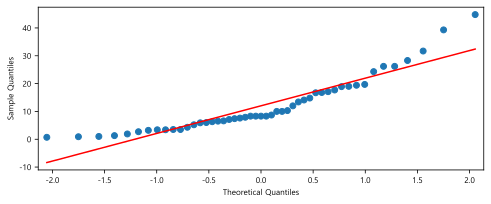

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
data = np.array([39.3,14.8,6.3,0.9,6.5,
                3.5,8.3,10.0,1.3,7.1,
                6.0,17.1,16.8,0.7,7.9,
                 2.7,26.2,24.3,17.7,3.2,
                 7.4,6.6,5.2,8.3,5.9,
                 3.5,8.3,44.8,8.3,13.4,
                 19.4,19.0,14.1,1.9,12.0,
                 19.7,10.3,3.4,16.7,4.3,
                 1.0,7.6,28.3,26.2,31.7,
                 8.7,18.9,3.4,10.0])
# statsmodels.api의 qqplot() 함수 활용하여 Q-Q Plot 그리기 가능
sma.qqplot(data, line='s', ax=ax)
ss.shapiro(data)

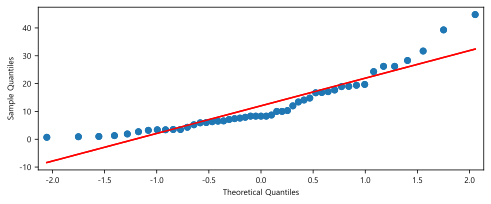

In [18]:
data = np.array([39.3,14.8,6.3,0.9,6.5,
                3.5,8.3,10.0,1.3,7.1,
                6.0,17.1,16.8,0.7,7.9,
                 2.7,26.2,24.3,17.7,3.2,
                 7.4,6.6,5.2,8.3,5.9,
                 3.5,8.3,44.8,8.3,13.4,
                 19.4,19.0,14.1,1.9,12.0,
                 19.7,10.3,3.4,16.7,4.3,
                 1.0,7.6,28.3,26.2,31.7,
                 8.7,18.9,3.4,10.0])
sma.qqplot(data, line='s', ax=ax)

In [19]:
# numpy의 sqrt() 함수를 통해 제곱근 가능, power() 함수를 통해 네제곱근도 가능
np.sqrt(data), np.power(data, 1/4)

(array([6.26897121, 3.84707681, 2.50998008, 0.9486833 , 2.54950976,
        1.87082869, 2.88097206, 3.16227766, 1.14017543, 2.66458252,
        2.44948974, 4.13521463, 4.09878031, 0.83666003, 2.81069386,
        1.64316767, 5.11859356, 4.92950302, 4.20713679, 1.78885438,
        2.7202941 , 2.56904652, 2.28035085, 2.88097206, 2.42899156,
        1.87082869, 2.88097206, 6.69328021, 2.88097206, 3.66060104,
        4.40454311, 4.35889894, 3.75499667, 1.37840488, 3.46410162,
        4.4384682 , 3.20936131, 1.84390889, 4.08656335, 2.07364414,
        1.        , 2.75680975, 5.31977443, 5.11859356, 5.6302753 ,
        2.94957624, 4.34741302, 1.84390889, 3.16227766]),
 array([2.50379137, 1.96139665, 1.58429166, 0.97400375, 1.59671843,
        1.3677824 , 1.69734265, 1.77827941, 1.06778997, 1.6323549 ,
        1.56508458, 2.03352271, 2.02454447, 0.91469122, 1.67651241,
        1.28186102, 2.2624309 , 2.22024841, 2.05113061, 1.33748061,
        1.64933141, 1.60282454, 1.51008306, 1.69734265, 1.

(array([  5.,  13.,  16.,  46.,  60.,  78., 102., 109., 134., 111., 102.,
         75.,  62.,  53.,  20.,   5.,   5.,   3.,   0.,   1.]),
 array([465.1   , 469.1882, 473.2764, 477.3646, 481.4528, 485.541 ,
        489.6292, 493.7174, 497.8056, 501.8938, 505.982 , 510.0702,
        514.1584, 518.2466, 522.3348, 526.423 , 530.5112, 534.5994,
        538.6876, 542.7758, 546.864 ]),
 <BarContainer object of 20 artists>)

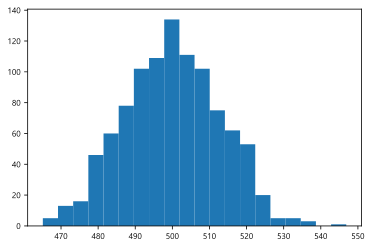

In [49]:
# 0-999 숫자 중 500개를 추출하여 평균을 구하는 것을 10000번 반복하여 m에 할당
# np.random.randint에 size='n'인자를 전달하면 n개 추출 가능
m = [np.mean(np.random.randint(0, 1000, size=500)) for i in range(1000)]
plt.hist(m, bins=20)

ShapiroResult(statistic=0.9978249669075012, pvalue=0.21687065064907074)

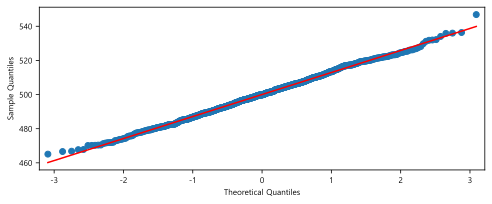

In [50]:
fig, ax = plt.subplots(figsize=(8, 3))
# qqplot을 그리기 위해서는 list 형태인 m을 np.array 형태로 바꿔줘야
sma.qqplot(np.array(m), line='s', ax=ax)
ss.shapiro(np.array(m))

In [54]:
height=np.array([163,161,168,161,157,162,153,159,164,170,
                 152,160,157,168,150,165,156,151,162,150,
                 156,152,161,165,168,167,165,168,159,156])
# 표준오차를 구하기 위해 ss.sem() 함수 활용
x_sample, std, se = np.mean(height), np.std(height, ddof=1), ss.sem(height)
# 정규분포 z검정에 있어 p-value 계산을 위해 ss.norm.cdf(), 신뢰구간 계산을 위해 ss.norm.ppf() 함수 활용
# ss.norm.ppf()에서 누적확률 인자만 전달하면 z값 반환
# z = (x_sample-u)/SE
ss.norm.ppf(0.05/2), ss.norm.ppf(0.05/2, x_sample, se), ss.norm.ppf(1 - (0.05/2), x_sample, se), 2 * (1 - ss.norm.cdf((x_sample - 159) / se)), ss.ttest_1samp(height, popmean=159, alternative='two-sided')

(-1.9599639845400545,
 158.05626002483402,
 162.34373997516596,
 0.27258551722126834,
 Ttest_1sampResult(statistic=1.097127827392377, pvalue=0.28161234349518455))

In [23]:
noise=np.array([55.9,63.8,57.2,59.8,65.7,62.7,60.8,51.3,61.8,56.0,
                66.9,56.8,66.2,64.6,59.5,63.1,60.6,62.0,59.4,67.2,
                63.6,60.5,66.8,61.8,64.8,55.8,55.7,77.1,62.1,61.0,
                58.9,60.0,66.9,61.7,60.3,51.5,67.0,60.2,56.2,59.4,
                67.9,64.9,55.7,61.4,62.6,56.4,56.4,69.4,57.6,63.8
                ])
x_sample, std, se = np.mean(noise), np.std(noise, ddof=1), ss.sem(noise)
# 초과한다는 것을 확인하기 위해서는 단측검정 실시 -> 양측 검정일 경우 2를 곱해야
x_sample, ss.norm.ppf(0.02/2, x_sample, se), ss.norm.ppf(1 - (0.02/2), x_sample, se), (1 - ss.norm.cdf((x_sample - 60) / se))

(61.373999999999995,
 59.801357233295455,
 62.946642766704535,
 0.02105135325692642)

In [24]:
bacteria=np.array([175,190,215,198,184,207,210,193,196,180])
x_sample, std, se, df = np.mean(bacteria), np.std(bacteria, ddof=1), ss.sem(bacteria), len(bacteria) - 1
# t검정에 있어 p-value 계산을 위해 ss.t.cdf(), 신뢰구간 계산을 위해 ss.t.ppf() 함수 활용
# ss.t.cdf((loc(평균) - x) / scale(표준편차[오차])) -> 즉 1 - ss.t.cdf() 가 확률값
# ss.t.ppf(q(누적확률), df(자유도), loc(평균), scale(표준편차[오차]))
# ss.t.ppf()에서 누적확률 및 자유도 인자만 전달하면 t값 반환
x_sample, ss.t.ppf(0.1/2, df, x_sample, se), ss.t.ppf(1 - (0.1/2), df, x_sample, se), 2 * (1 - ss.t.cdf((x_sample-190)/se, df))

(194.8, 187.18381345213294, 202.41618654786708, 0.2777193282390795)

(-2.131449545559323, 37.97673136750427, 42.52326863249573, 0.05210168100732071)

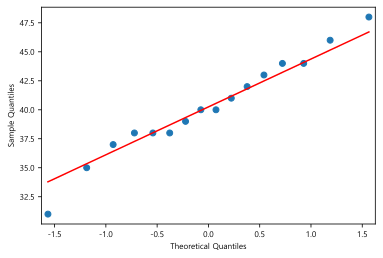

In [25]:
data = np.array([31,35,37,38,38,38,39,40,40,41,42,43,44,44,46,48])
x_sample, std, se, df = np.mean(data), np.std(data, ddof=1), ss.sem(data), len(data) - 1
sma.qqplot(data, line='s')
# ss.t.ppf()를 통해 범위를 구할 경우 df(자유도)가 두 번째 인자라는 사실을 기억해야
ss.t.ppf(0.05/2, df), ss.t.ppf(0.05/2, df, x_sample, se), ss.t.ppf(1 - (0.05/2), df, x_sample, se), 2 * (1 - ss.t.cdf((x_sample - 38) / se, df))

In [26]:
from random import sample


x = np.array([77, 77, 78, 78, 81, 81, 82, 82, 82, 82,
              82, 83, 83, 84, 84, 84, 84, 85, 86, 86,
              86, 86, 86, 87, 87, 87, 87, 87, 87, 87,
              89, 89, 89, 89, 89, 89, 89, 90, 90, 90,
              91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
              93, 93, 93, 93, 93, 93, 94, 94, 94, 94,
              94, 94, 94, 94, 94, 94, 94, 94, 95, 95,
              95, 95, 95, 96, 96, 96, 96, 96, 96, 97,
              97, 97, 97, 97, 97, 97, 97, 97, 98, 99,
              100, 100, 100, 100, 100, 100, 100, 100,
              100, 101, 101, 101, 101, 101, 101, 102,
              102, 102, 102, 102, 102, 103, 103, 104,
              104, 104, 105, 107])
y = np.array([71, 72, 73, 74, 75, 77, 78, 79, 79, 79,
              79, 80, 80, 80, 81, 81, 81, 82, 82, 82,
              82, 84, 84, 84, 84, 84, 84, 85, 85, 85,
              85, 85, 85, 86, 86, 87, 88, 90, 91, 94])
sample_mean, var_x, var_y, std_x, std_y, n_x, n_y = np.mean(x) - np.mean(y), np.var(x, ddof=1), np.var(y, ddof=1), np.std(x, ddof=1), np.std(y, ddof=1), len(x), len(y)
se = np.sqrt(var_x/n_x + var_y/n_y)
# 두 집단 비교 시 표본의 크기가 둘 모두 30 이상일 때 정규분포 활용 가능
ss.norm.ppf(0.01/2, sample_mean, se), ss.norm.ppf(1 - (0.01/2), sample_mean, se), 2 * (1 - ss.norm.cdf((sample_mean-0)/se))

(8.246771760724545, 13.467635018936459, 0.0)

In [27]:
# 만약 t분포를 활용한다고 할 시 분산이 같다고 가정할 경우 se를 새로 구해야
# 먼저 공통으로 적용되는 분산(var_total)을 구한 뒤 se_total을 추출해야
var_total = ((n_x - 1) * var_x + (n_y - 1) * var_y) / (n_x + n_y - 2)
se_total = np.sqrt(var_total / n_x + var_total / n_y)
ss.t.ppf(0.02/2, n_x + n_y - 2, sample_mean, se_total), ss.t.ppf(1 - (0.02/2), n_x + n_y - 2, sample_mean, se_total)

(8.062061609023742, 13.652345170637263)

In [55]:
# 만약 t분포를 활용한다고 할 시 분산이 다르다고 가정할 시 정규분포와 비슷한 형태로 진행? → 자유도만 추가?
ss.t.ppf(0.01/2, n_x + n_y - 2, sample_mean, se), ss.t.ppf(1 - (0.01/2), n_x + n_y - 2, sample_mean, se), 2 * (1 - ss.t.cdf((sample_mean-0)/se, n_x + n_y - 2)), ss.ttest_ind(x, y, equal_var=False, alternative='two-sided')

(8.00497944173248,
 13.709427337928524,
 0.0,
 Ttest_indResult(statistic=89.5140445486243, pvalue=3.5322623774852276e-81))

In [56]:
height = np.array([181, 161, 170, 160, 158, 168, 162, 179, 183, 178,
                   171, 177, 163, 158, 160, 160, 158, 173, 160, 163,
                   167, 165, 163, 173, 178, 170, 167, 177, 175, 169,
                   152, 158, 160, 160, 159, 180, 169, 162, 178, 173,
                   173, 171, 171, 170, 160, 167, 168, 166, 164, 173,
                   180])
weight = np.array([78, 49, 52, 53, 50, 57, 53, 54, 71, 73,
                   55, 73, 51, 53, 65, 48, 59, 64, 48, 53,
                   78, 45, 56, 70, 68, 59, 55, 64, 59, 55,
                   38, 45, 50, 46, 50, 63, 71, 52, 74, 52,
                   61, 65, 68, 57, 47, 48, 58, 59, 55, 74,
                   74])
data = {'height':height, 'weight':weight}
# statsmodels.formula.api의 ols(model, data).fit() 함수 사용하여 RegressionResultWrapper 객체 생성 가능
# smfa.ols().fit()은 분산분석에서도 활용 가능
fit = smfa.ols('weight ~ height', data=data).fit()
# summary() 메서드 연결하여 요약 출력도 가능
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     58.01
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           7.40e-10
Time:                        00:22:48   Log-Likelihood:                -168.30
No. Observations:                  51   AIC:                             340.6
Df Residuals:                      49   BIC:                             344.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.7820     20.912     -4.819      0.000    -142.806     -58.758
height         0.9479      0.124      7.616      0.000       0.698       1.198
==============================================================================
Omnibus:                        5.480   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.425
Skew:                           0.569   Prob(JB):                        0.109
Kurtosis:                       3.886   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# 딕셔너리를 활용하지 않을 경우 DataFrame 생성 방법
data_df = (pd.concat([pd.Series(height), pd.Series(weight)], axis=1)
.rename(dict(enumerate(['height', 'weight'])), axis=1)
)
# 기존 존재하는 data(딕셔너리)로 쉽게 DataFrame 생성
data_df = pd.DataFrame(data, columns=['height', 'weight'])
# statsmodels.formula.api의 ols(model, data).fit() 함수는 딕셔너리뿐 아니라 DataFrame 형태에서도 가능!
fit = smfa.ols('height ~ weight', data=data_df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     58.01
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           7.40e-10
Time:                        21:03:33   Log-Likelihood:                -155.41
No. Observations:                  51   AIC:                             314.8
Df Residuals:                      49   BIC:                             318.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.5016      4.440     30.292      0.000     125.579     143.425
weight         0.5719      0.075      7.616      0.000       0.421       0.723
==============================================================================
Omnibus:                        0.983   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.330
Skew:                           0.037   Prob(JB):                        0.848
Kurtosis:                       3.387   Cond. No.                         361.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# fit.conf_int(1 - n) 메서드 연결하여 n%에 대한 신뢰구간 구하는 것도 가능
# fit의 resid 속성 이용하여 각 개체당 잔차 출력도 가능
fit.conf_int(0.05), fit.resid

(                    0           1
 Intercept  125.578684  143.424506
 weight       0.421011    0.722800,
 0      1.889782
 1     -1.524961
 2      5.759323
 3     -4.812583
 4     -5.096867
 5      0.899795
 6     -2.812583
 7     13.615512
 8      7.893120
 9      1.749309
 10     5.043606
 11     0.749309
 12    -0.668772
 13    -6.812583
 14   -11.675448
 15    -1.953056
 16   -10.244015
 17     1.896457
 18    -1.953056
 19    -1.812583
 20   -12.110218
 21     4.762661
 22    -3.528299
 23    -1.534975
 24     4.608836
 25     1.755985
 26     1.043606
 27     5.896457
 28     6.755985
 29     3.043606
 30    -4.234001
 31    -2.237339
 32    -3.096867
 33    -0.809245
 34    -4.096867
 35     9.468363
 36    -6.106880
 37    -2.240677
 38     1.177403
 39     8.759323
 40     3.612174
 41    -0.675448
 42    -2.391164
 43     2.899795
 44    -1.381150
 45     5.046944
 46     0.327890
 47    -2.244015
 48    -1.956394
 49    -3.822597
 50     3.177403
 dtype: float64)

<AxesSubplot:xlabel='height', ylabel='weight'>

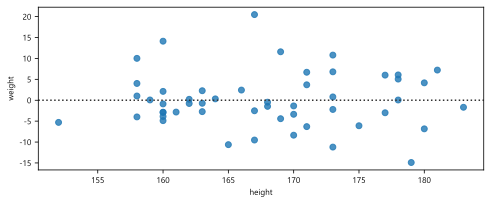

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
df_data = pd.DataFrame(data, columns=['height', 'weight'])
# seaborn의 residplot(data, x, y) 함수 이용하여 잔차도 출력
sns.residplot(data=df_data, x='height', y='weight', ax=ax)

In [57]:
y = np.array([10,15,8,12,15,
            14,18,21,15,
            17,16,14,15,17,15,18,
            12,15,17,15,16,15])
# numpy의 repeat() 함수 활용하여 A, B, C, D를 각 5, 4, 7, 6번 반복하는 array 생성
treat = np.repeat(['A', 'B', 'C', 'D'],[5, 4, 7, 6])
data = pd.DataFrame({'y':y, 'treat':treat})
# smfa.ols().fit() 이용하여 RegressionResultWrapper 객체 생성
fit = smfa.ols('y ~ C(treat)', data).fit()
# statsmodel.api 내 stats.anova_lm() 함수 활용하여 일원분산분석 진행 가능
# treat에서의 처리제곱합(SStr)과 Residual에서의 오차제곱합(SSE)으로 분해 → SStr + SSE = SST
# F값은 MStr / MSE ~ F(k-1, n-k)
sma.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(treat),3.0,68.0,22.666667,4.340426,0.018136
Residual,18.0,94.0,5.222222,NaN,NaN


In [34]:
O = np.array([18,55,27])
Pr = np.array([0.25,0.50,0.25])
# sum() 메서드 활용하여 numpy array내 총 합계 추출 가능
n = O.sum()
# 총 합계 * numpy array 확률을 곱하면 numpy array 형태로 출력
E = n * Pr
dof = len(O) - 1
O, Pr, n, E, dof
# scipy.stats의 chisquare(o, e) 함수 활용하여 카이제곱 적합도 검정 진행 가능
# ss.chisquare() 함수는 카이제곱 값 및 p-value를 튜플로 추출
chi2, p_value = ss.chisquare(O, E)
chi2, p_value

(2.62, 0.26982005638468687)

In [35]:
diet = np.array([[37,24,19],[17,33,20]])
column_names = ['Good', 'Normal', 'Bad']
row_names = ['diet_A', 'diet_B']
table = pd.DataFrame(diet, columns=column_names, index=row_names)
table
# scipy.stats의 chi2_contingency(data) 함수 활용하여 카이제곱 동질성 검정 진행 가능
# ss.chi2_contingency() 함수는 카이제곱 값, p-value, 자유도, 기대도수를 튜플로 추출
chi2, p_value, dof, expected = ss.chi2_contingency(table)
chi2, p_value, dof, expected

(8.22398544438018,
 0.01637511094543408,
 2,
 array([[28.8, 30.4, 20.8],
        [25.2, 26.6, 18.2]]))